## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名 王珂 
+ 学号 0163446

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pandas import *
from random import *
import matplotlib.pyplot as plt
from numpy import *

In [33]:
""" 读入数据和预处理 """
df  = read_csv("CEPS.csv",encoding="gb2312")
df.dropna(axis=0, how='any')    # 删除有缺失值的行
sample = DataFrame()

F:\Python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
# 特征列选取a13,a14
A13_avg_list = []
A14_avg_list = []
rand = [randint(1,18000) for i in range(30)]
for i in rand:
    # 从整个文件中随机选择一数据行作为起始，连续读入1000条
    # 重复30次，求得两个特征的30个均值，分别存放在A13_avg_list,A14_avg_list中
    sample = df[i:i+1000]
    A13 = sample['a13']
    A13 = to_numeric(A13, errors='coerce').fillna(0)
    A13_avg = A13.mean()
    A13_avg_list.append(A13_avg)

    A14 = sample['a14']
    A14 = to_numeric(A14, errors='coerce').fillna(0)
    A14_avg = A14.mean()
    A14_avg_list.append(A14_avg)

print("A13的30个样本均值",A13_avg_list)
print("A14的30个样本均值",A14_avg_list)

A13的30个样本均值 [155.326, 155.061, 157.402, 159.548, 150.487, 152.899, 154.61, 150.544, 155.838, 158.355, 147.206, 155.584, 148.7, 158.945, 157.494, 155.991, 157.651, 160.202, 162.925, 161.671, 156.412, 157.882, 155.521, 159.44, 161.491, 155.486, 159.965, 159.241, 147.937, 157.594]
A14的30个样本均值 [85.636, 88.065, 92.659, 93.482, 80.883, 85.441, 87.618, 81.991, 90.434, 94.238, 76.821, 92.217, 77.297, 91.031, 88.598, 87.471, 91.028, 99.712, 100.286, 97.621, 92.126, 92.737, 87.524, 97.383, 96.937, 88.609, 95.568, 91.36, 78.672, 93.812]


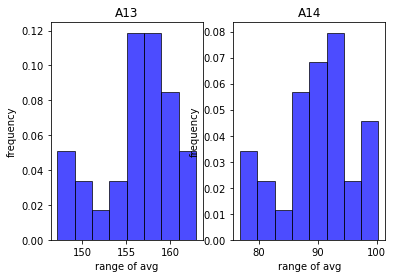

In [35]:
"""
根据30个样本均值绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.subplot(121)
plt.hist(A13_avg_list, bins= 8,normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("range of avg")
# 显示纵轴标签
plt.ylabel("frequency")
# 显示图标题
plt.title("A13")
plt.subplot(122)
plt.hist(A14_avg_list, bins= 8,normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("range of avg")
# 显示纵轴标签
plt.ylabel("frequency")
# 显示图标题
plt.title("A14")
plt.show()


In [38]:
"""计算最终的均值和标准误"""

A13_avg_list = array(A13_avg_list)
A14_avg_list = array(A14_avg_list)
A13_u = A13_avg_list.mean()
print("A13的最终均值",A13_u)
A13_std = A13_avg_list.std(ddof=1)  #A13的无偏估计量
print("A13的无偏标准差",A13_std)
A14_u = A14_avg_list.mean()     #A14的无偏估计量
print("A14的最终均值",A14_u)
A14_std = A14_avg_list.std(ddof=1)
print("A14的无偏标准差",A14_std)

A13的最终均值 156.246933333
A13的无偏标准差 4.04078986759
A14的最终均值 89.9085666667
A14的无偏标准差 6.27164093736


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
sentinels = {'b15a1': [' '], 'b15a2': [' '],'b15b1':[' '],'b15b2':[' '],'b15c1':[' '],'b15c2':[' '],
             'b15d1':[' '],'b15d2':[' '],'b15e1':[' '],'b15e2':[' '],'b15f1':[' '],'b15f2':[' '],
             'b16a1': [' '], 'b16a2': [' '],'b16b1':[' '],'b16b2':[' '],'b16c1':[' '],'b16c2':[' '],
             'b16d1':[' '],'b16d2':[' '],'b16e1':[' '],'b16e2':[' '],'b16f1':[' '],'b16f2':[' '],
             'a1801':[' '],
             'a17':[' '],
             'b18a':[' '],'b18b':[' ']}
#把睡眠时间作为因变量
#把学习时间作为自变量x1，娱乐时间作为自变量x2，参加课外活动和读课外书的时间作为自变量x3，
#心情的好坏为自变量x4，身体的健康状况为x5
df=pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df.dropna(axis=0, how='any')    
# 删除有缺失值的行
s=df
s

F:\Python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2
5,6,1,1,1,3,3,218.738892,0,0,12,...,2,1,,,8,8,8,1,2,1
6,7,1,1,1,3,3,218.738892,0,0,14,...,2,1,,,4,6,6,1,1,2
7,8,1,1,1,3,3,216.518234,0,0,13,...,2,1,,,8,8,8,1,1,2
8,9,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
9,10,1,1,1,3,3,216.518234,0,0,16,...,2,1,,,7,8,8,1,1,2


In [28]:
data=pd.DataFrame({'x1':s.b15a1+s.b15a2/60+s.b15b1+s.b15b2/60+s.b16a1+s.b16a2/60+s.b16b1+s.b16b2/60,
                  'x2':s.b15e1+s.b15e2/60+s.b15f1+s.b15f2/60+s.b16e1+s.b16e2/60+s.b16f1+s.b16f2/60,
                  'x3':s.b15c1+s.b15c2/60+s.b15d1+s.b15d2/60+s.b16c1+s.b16c2/60+s.b16d1+s.b16d2/60,
                  'x4':s.a1801,
                  'x5':s.a17,
                  'y':s.b18a+s.b18b/60})
data=data.dropna(axis=0,how='any')
data

,x1,x2,x3,x4,x5,y
0,2.333333,1.333333,4.500000,1.0,5.0,9.000000
1,4.000000,2.500000,9.500000,1.0,5.0,9.000000
2,2.250000,7.000000,3.000000,2.0,4.0,8.000000
3,2.000000,2.500000,4.000000,3.0,3.0,9.000000
4,0.000000,8.500000,6.000000,2.0,4.0,7.500000
5,0.000000,4.000000,5.000000,3.0,5.0,7.500000
6,0.000000,5.500000,4.000000,2.0,4.0,7.000000
7,22.000000,0.500000,5.500000,1.0,4.0,7.500000
8,4.000000,2.000000,6.333333,3.0,5.0,8.000000
9,5.000000,2.666667,6.500000,4.0,5.0,7.000000


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
#构建自变量
model_x= ['x1','x2','x3','x4','x5']
X = data.loc[ :,model_x].values
#构建因变量
y=data['y'].values
X_model = sm.add_constant(X)
#加入截距
print(X)
print(y)
print(X_model)

[[ 2.33333333  1.33333333  4.5         1.          5.        ]
 [ 4.          2.5         9.5         1.          5.        ]
 [ 2.25        7.          3.          2.          4.        ]
 ..., 
 [ 6.83333333  3.5         3.66666667  3.          4.        ]
 [ 5.          5.          4.          2.          5.        ]
 [ 8.5         3.5         6.5         3.          4.        ]]
[ 9.          9.          8.         ...,  8.5         7.          7.83333333]
[[ 1.          2.33333333  1.33333333  4.5         1.          5.        ]
 [ 1.          4.          2.5         9.5         1.          5.        ]
 [ 1.          2.25        7.          3.          2.          4.        ]
 ..., 
 [ 1.          6.83333333  3.5         3.66666667  3.          4.        ]
 [ 1.          5.          5.          4.          2.          5.        ]
 [ 1.          8.5         3.5         6.5         3.          4.        ]]


In [32]:
model = sm.OLS(y, X) 
#拟合ols回归
results = model.fit()
results.params

array([-0.03109575,  0.05329631,  0.06863427,  0.66963671,  1.4275905 ])

In [33]:
print(results.summary())
#输出回归的结果

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 5.166e+04
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:34:40   Log-Likelihood:                -36851.
No. Observations:               17298   AIC:                         7.371e+04
Df Residuals:                   17293   BIC:                         7.375e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0311      0.003     -8.924      0.0

In [ ]:
回归结果：
    模型拟合指标:
        当R²大于0.9时，说明模型的拟合效果较好。
        该回归模型的可决系数为0.937，说明该模型拟合效果比较好。解释变量学习时间、课外活动时间、
    娱乐时间、心情的好坏和健康程度对被解释变量睡眠时间有比较大的解释力度。
        
    模型的显著性检验结果：
        上图中的Prob（Omnibus）<0.05，说明该模型的结果是统计显著的。
    
    变量的系数：
        x1的系数为-0.0311，对因变量呈负相关；x2前系数为0.0533，x3前系数为0.0686，x4前系数为0.6696，
    x5前系数为1.4276，这4个自变量与因变量呈正向相关。
    各系数的显著性检验结果：
        各变量的t统计量都比较大，且p值<0.05，说明这5个自变量都是统计显著的，即学习时间、课外活动时间、
    娱乐时间、心情的好坏和健康程度都对因变量睡眠时间有显著影响的。
    
    对模型结果的解释：
        学习时间、课外活动时间、娱乐时间、心情的好坏和健康程度都与因变量睡眠时间有关。
        即学习时间的多少、课外活动时间的多少、娱乐时间的多少、心情的好坏和身体的健康程度，都会对个人的
    睡眠时间产生影响。
        